In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [48]:
#1

J = 1
kB = 1

def transfer(T,B):
    beta = 1/(kB*T)
    return ([  [np.exp(beta*(J+B)),np.exp(-beta*J)],[np.exp(-beta*J),np.exp(beta*(J-B))]  ])

In [49]:
print(transfer(1,5))

[[403.4287934927351, 0.36787944117144233], [0.36787944117144233, 0.01831563888873418]]


In [50]:
#2

def eigenvalues(T,B):
    return np.linalg.eigvalsh ( transfer(T,B) ) 
def exact(T,B):
    b = 1/(kB*T)
    lamda_1 = np.exp(b*J)*(np.cosh(b*B)+(np.sinh(b*B)**2+np.exp(-4*b*J))**0.5)
    lamda_2 = np.exp(b*J)*(np.cosh(b*B)-(np.sinh(b*B)**2+np.exp(-4*b*J))**0.5)
    lamda   = np.array( [lamda_1,lamda_2] )
    return lamda

In [51]:
print (exact(1,5))

[4.03429129e+02 1.79801613e-02]


In [52]:
# 3 

def partition(T,B,N):
    T = transfer(T,B)
    z = np.array([[1,0]
                  ,[0,1]])
    for i in range (N):
        z = np.dot(z,T)
        
    return np.trace(z)


def partition_exact(T,B,N):
    kb = 1
    beta = 1/(kb*t)
    lambda_1 = np.exp(beta*J)*np.cosh(beta*B) + np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    lambda_2 = np.exp(beta*J)*np.cosh(beta*B) - np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    return (lambda_1**N) + (lambda_2**N)

print (partition(1,5,100))
print (partition(1,5,100))

3.7733340653022634e+260
3.7733340653022634e+260


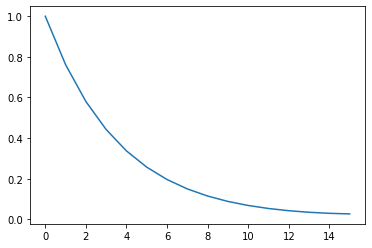

In [68]:
# 4 

def correlation(T,B,N):
    kb = 1
    beta = 1/(kb*t)
    
    impurity = np.array([[1,0],
                        [0,-1]])
    
    T = transfer(T,B)
    SzSz = np.zeros(N+1)
    for j in range(N):
        
        z = np.array([[1,0],[0,1]])
        
        z_s0sj = impurity
        for i in range(N):
            z = np.dot(z,T)
            if i == j:
                z_s0sj = z_s0sj @ impurity @ T
            else :
                z_s0sj = np.dot(z_s0sj,T)    
            SzSz[j] = np.trace(z_s0sj)/np.trace(z)
    SzSz[N] = SzSz[0]
    

    plt.plot(SzSz[0:int(N/2)]) 
    
correlation(1,0,32)


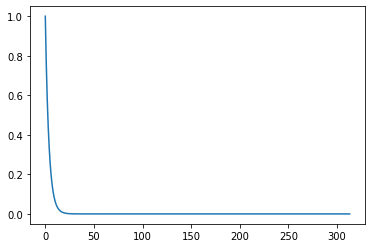

In [110]:
# 5


# LARGEST N
correlation(1,0,629)



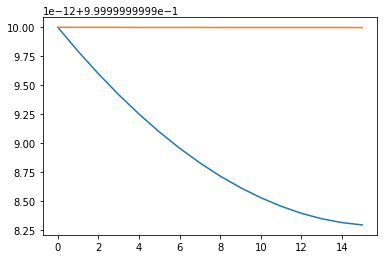

In [108]:
# LOWEST T
correlation(0.12,0,32)


# LOWER
correlation(0.1,0,32)